Hints and Considerations

* The city data you generate is based on random coordinates as well as different query times; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? Which JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* Starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Remember that each coordinate will trigger a separate call to the Google API. If you're creating your own criteria to plan your vacation, try to reduce the results in your DataFrame to 10 or fewer cities.

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Obtain the weather from each city using the OpenWeatherMap API.
* Include a print log of each city as it's being processed, with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json as json
import matplotlib.colors as mcolors
import config

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
#lats = np.random.uniform(lat_range[0], lat_range[1], size=20)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=20)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)


632

Perform API Calls
Perform a weather check on each city using a series of successive API calls.

##Include a print log of each city as it's being processed (with the city number and city name).

***Note that these will be at different times of day, depending on longitude... do have timezone... historical data for e.g. last 5 days would be better, but is a lot more data; longer-term costs money. Suppose could divide calls to database by timezone, do a call at e.g. local noon until have the complete set.
OpenWeatherMap uses Unix time and UTC/GMT time zone for all API calls including current weather, forecast and historical data.
api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}

In [3]:
#test_weather_data = []
#test_cities = {"Bremen", "Boston", "Bilbao", "Quito", "Auckland"}
url = "http://api.openweathermap.org/data/2.5/weather?q="
place = []
lon = []
lat = []
weather = []
weather_desc = []
temp_C = []
feels_like = []
temp_min_C = []
temp_max_C = []
humidity = []
wind_speed = []
clouds = []
country = []
timezone = []
units = "metric"

for city in cities:
    query_url = url + city + "&appid=" + weather_api_key + "&units=" + units
    current_weather = requests.get(query_url).json()
    #print(json.dumps(current_weather, indent=4, sort_keys=True))
    place.append(city)
    try:
        lat.append(current_weather['coord']['lat'])
        lon.append(current_weather['coord']['lon'])
        temp_C.append(current_weather['main']['temp'])
        feels_like.append(current_weather['main']['feels_like'])
        temp_min_C.append(current_weather['main']['temp_min'])
        temp_max_C.append(current_weather['main']['temp_max'])
        humidity.append(current_weather['main']['humidity'])
        wind_speed.append(current_weather['wind']['speed'])
        clouds.append(current_weather['clouds']['all'])
        country.append(current_weather['sys']['country'])
        timezone.append(current_weather['timezone'])
    except:
        lat.append("555")
        lon.append("555")
        temp_C.append("555")
        feels_like.append("555")
        temp_min_C.append("555")
        temp_max_C.append("555")
        humidity.append("555")
        wind_speed.append("555")
        clouds.append("555")
        country.append("555")
        timezone.append("555")
    #print(json.dumps(current_weather, indent=4, sort_keys=True))
    #test_weather_data.append(current_weather_json)
#len(lat)
#print(query_url)

In [4]:
#Convert Raw Data to DataFrame
cities_df = pd.DataFrame({
    "City": place,
    "Lat": lat,
    "Lon": lon,
    "Temp_C": temp_C,
    "Feels_like": feels_like,
    "Temp_min_C": temp_min_C,
    "Temp_max_C": temp_max_C,
    "Humidity": humidity,
    "Wind_speed_mph": wind_speed,
    "Clouds": clouds,
    "Country": country,
    "Time_zone": timezone
})

#Export the city data into a .csv - no, waiting for next cleanup steps.
#cities_df.to_csv(output_data_file)

#Display the DataFrame
cities_df


,City,Lat,Lon,Temp_C,Feels_like,Temp_min_C,Temp_max_C,Humidity,Wind_speed_mph,Clouds,Country,Time_zone
0,ambilobe,-13.2,49.05,21,21.92,21,21,70,1.15,94,MG,10800
1,datia,25.67,78.47,33.78,36.28,33.78,33.78,43,1.32,48,IN,19800
2,arraial do cabo,-22.97,-42.03,27.42,25.36,27,28,61,7.7,50,BR,-10800
3,la paz,-16.5,-68.15,13,8.37,13,13,17,2.1,40,BO,-14400
4,itoman,26.12,127.67,27.93,31.61,27.78,28,88,4.6,20,JP,32400
...,...,...,...,...,...,...,...,...,...,...,...,...
627,rawson,-43.3,-65.1,4.17,-1.59,4.17,4.17,80,5.62,100,AR,-10800
628,tambopata,-12.73,-69.18,31,35.28,31,31,66,2.1,75,PE,-18000
629,urumqi,43.8,87.6,24,23.5,24,24,57,3,75,CN,28800
630,deputatskiy,69.3,139.9,17.99,17.32,17.99,17.99,57,0.77,78,RU,36000


Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

In [5]:
#Also dropping rows with "555" (no data) values.

cities_df["Lat"] = pd.to_numeric(cities_df["Lat"])
cities_df["Lon"] = pd.to_numeric(cities_df["Lon"])
cities_df["Temp_C"] = pd.to_numeric(cities_df["Temp_C"])
cities_df["Feels_like"] = pd.to_numeric(cities_df["Feels_like"])
cities_df["Temp_min_C"] = pd.to_numeric(cities_df["Temp_min_C"])
cities_df["Temp_max_C"] = pd.to_numeric(cities_df["Temp_max_C"])
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"])
cities_df["Wind_speed_mph"] = pd.to_numeric(cities_df["Wind_speed_mph"])
cities_df["Clouds"] = pd.to_numeric(cities_df["Clouds"])
cities_df["Time_zone"] = pd.to_numeric(cities_df["Time_zone"])
#cities_df.dtypes

cities_df.drop(cities_df[cities_df['Humidity'] > 100].index, inplace = True)
cities_df.drop(cities_df[cities_df['Temp_C'] == 555].index, inplace = True)

#Export the city data into a .csv
cities_df.to_csv(output_data_file)

cities_df

,City,Lat,Lon,Temp_C,Feels_like,Temp_min_C,Temp_max_C,Humidity,Wind_speed_mph,Clouds,Country,Time_zone
0,ambilobe,-13.20,49.05,21.00,21.92,21.00,21.00,70,1.15,94,MG,10800
1,datia,25.67,78.47,33.78,36.28,33.78,33.78,43,1.32,48,IN,19800
2,arraial do cabo,-22.97,-42.03,27.42,25.36,27.00,28.00,61,7.70,50,BR,-10800
3,la paz,-16.50,-68.15,13.00,8.37,13.00,13.00,17,2.10,40,BO,-14400
4,itoman,26.12,127.67,27.93,31.61,27.78,28.00,88,4.60,20,JP,32400
...,...,...,...,...,...,...,...,...,...,...,...,...
627,rawson,-43.30,-65.10,4.17,-1.59,4.17,4.17,80,5.62,100,AR,-10800
628,tambopata,-12.73,-69.18,31.00,35.28,31.00,31.00,66,2.10,75,PE,-18000
629,urumqi,43.80,87.60,24.00,23.50,24.00,24.00,57,3.00,75,CN,28800
630,deputatskiy,69.30,139.90,17.99,17.32,17.99,17.99,57,0.77,78,RU,36000


Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

Temperature (F) vs. Latitude (Max temp?)

The r-squared is: 0.27359416933495256


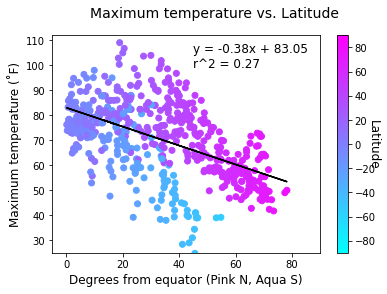

In [47]:
colors = plt.set_cmap('cool')
norm = mcolors.TwoSlopeNorm(vmin=-90, vcenter=0, vmax=90)

vmin = -90 
vmax = 90
vcenter = 0

y_values = ((cities_df["Temp_max_C"]*(9/5))+32)
x_values = abs(cities_df["Lat"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c=cities_df.Lat, cmap=colors, norm=norm)
plt.xlim(-5, 90)
plt.ylim(25, 112)
colorbar = plt.colorbar()
colorbar.set_label('Latitude', rotation=270, size = 12)

plt.plot(x_values,regress_values, "k-")
plt.annotate(line_eq,(45,105),fontsize=12,color="black")
r2 = (rvalue**2).round(decimals=2)
r2_text = (f"r^2 = {r2}")
plt.annotate(r2_text, (45,99),fontsize=12,color="black")
plt.xlabel('Degrees from equator (Pink N, Aqua S)', size=12)
plt.ylabel('Maximum temperature (˚F)', size=12)
plt.suptitle('Maximum temperature vs. Latitude', size=14)

#print(f"The r-squared is: {rvalue**2}")
plt.savefig('../output_data/Fig1_Max_temp_vs_latitude.png')
plt.show()


Humidity (%) vs. Latitude

The r-squared is: 0.004564500364774905


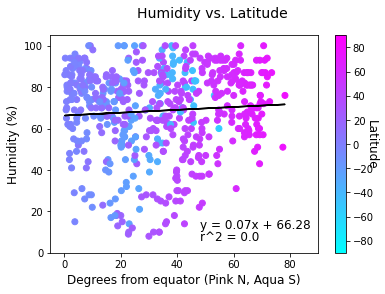

In [57]:
colors = plt.set_cmap('cool')
norm = mcolors.TwoSlopeNorm(vmin=-90, vcenter=0, vmax=90)

vmin = -90 
vmax = 90
vcenter = 0

y_values = cities_df["Humidity"]
x_values = abs(cities_df["Lat"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c=cities_df.Lat, cmap=colors, norm=norm)
plt.xlim(-5, 90)
plt.ylim(0, 105)
colorbar = plt.colorbar()
colorbar.set_label('Latitude', rotation=270, size = 12)

plt.plot(x_values,regress_values,"k-")
plt.annotate(line_eq,(48,12),fontsize=12,color="black")
r2 = (rvalue**2).round(decimals=2)
r2_text = (f"r^2 = {r2}")
plt.annotate(r2_text, (48,6),fontsize=12,color="black")
plt.xlabel('Degrees from equator (Pink N, Aqua S)', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.suptitle('Humidity vs. Latitude', size=14)

#print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/Fig2_Humidity_vs_latitude.png')
plt.show()

Cloudiness (%) vs. Latitude

The r-squared is: 0.003875512336803287


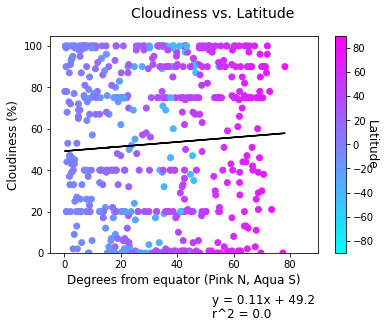

In [59]:
colors = plt.set_cmap('cool')
norm = mcolors.TwoSlopeNorm(vmin=-90, vcenter=0, vmax=90)

vmin = -90 
vmax = 90
vcenter = 0

y_values = cities_df["Clouds"]
x_values = abs(cities_df["Lat"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c=cities_df.Lat, cmap=colors, norm=norm)
plt.xlim(-5, 90)
plt.ylim(0, 105)
colorbar = plt.colorbar()
colorbar.set_label('Latitude', rotation=270, size = 12)

plt.plot(x_values,regress_values,"k-")
plt.text(0.5, -0.05, line_eq, fontsize=12, transform=plt.gcf().transFigure)
r2 = (rvalue**2).round(decimals=2)
r2_text = (f"r^2 = {r2}")
plt.text(0.5, -0.1, r2_text, fontsize=12, transform=plt.gcf().transFigure)
plt.xlabel('Degrees from equator (Pink N, Aqua S)', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.suptitle('Cloudiness vs. Latitude', size=14)

#print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/Fig3_Cloudiness_vs_latitude.png')
plt.show()

Wind Speed (mph) vs. Latitude

The r-squared is: 0.00026495390754823037


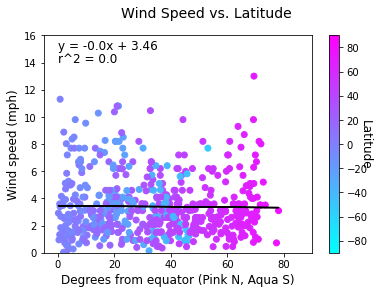

In [61]:
colors = plt.set_cmap('cool')
norm = mcolors.TwoSlopeNorm(vmin=-90, vcenter=0, vmax=90)

vmin = -90 
vmax = 90
vcenter = 0

y_values = cities_df["Wind_speed_mph"]
x_values = abs(cities_df["Lat"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c=cities_df.Lat, cmap=colors, norm=norm)
plt.xlim(-5, 90)
plt.ylim(0, 16)
colorbar = plt.colorbar()
colorbar.set_label('Latitude', rotation=270, size = 12)

plt.plot(x_values,regress_values,"k-")
plt.annotate(line_eq,(0,15),fontsize=12,color="black")
r2 = (rvalue**2).round(decimals=2)
r2_text = (f"r^2 = {r2}")
plt.annotate(r2_text, (0,14),fontsize=12,color="black")
plt.xlabel('Degrees from equator (Pink N, Aqua S)', size=12)
plt.ylabel('Wind speed (mph)', size=12)
plt.suptitle('Wind Speed vs. Latitude', size=14)

#print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/Fig4_Wind_speed_vs_latitude.png')
plt.show()

Linear Regression
#OPTIONAL: Create a function to create Linear Regression plots
**Optional:** Since you're creating multiple linear regression plots, you could do this in a function. To optimize 
your code, write a function that creates the linear regression plots based on parameters you provide. 
Again, this step is **optional**. 


#After each pair of plots (i.e., northern and southern hemispheres) explain what the linear regression is modeling, 
comment on any relationships you notice, and include any other analysis you may have.

Create Northern and Southern Hemisphere DataFrames (assigning the equator to the south, just because)

In [10]:
SH_cities_df = cities_df.drop(cities_df[cities_df['Lat'] > 0].index)
#SH_cities_df
NH_cities_df = cities_df.drop(cities_df[cities_df['Lat'] <= 0].index)
NH_cities_df

,City,Lat,Lon,Temp_C,Feels_like,Temp_min_C,Temp_max_C,Humidity,Wind_speed_mph,Clouds,Country,Time_zone
1,datia,25.67,78.47,33.78,36.28,33.78,33.78,43,1.32,48,IN,19800
4,itoman,26.12,127.67,27.93,31.61,27.78,28.00,88,4.60,20,JP,32400
5,vuktyl,63.86,57.31,19.05,16.60,19.05,19.05,56,3.59,13,RU,10800
6,butaritari,3.07,172.79,28.04,29.54,28.04,28.04,77,5.85,2,KI,43200
7,marawi,8.00,124.29,25.00,28.40,25.00,25.00,89,2.68,100,PH,28800
...,...,...,...,...,...,...,...,...,...,...,...,...
621,gilgit,35.92,74.31,28.91,27.73,28.91,28.91,24,0.46,2,PK,18000
622,bafq,31.61,55.41,32.41,26.10,32.41,32.41,10,5.58,0,IR,16200
626,zlobin,45.29,14.65,28.00,30.61,28.00,28.00,65,2.10,20,HR,7200
629,urumqi,43.80,87.60,24.00,23.50,24.00,24.00,57,3.00,75,CN,28800


Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression

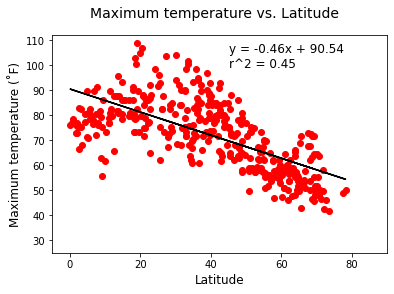

In [72]:
y_values = ((NH_cities_df["Temp_max_C"]*(9/5))+32)
x_values = NH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,c="red")
plt.xlim(-5, 90)
plt.ylim(25, 112)

plt.plot(x_values,regress_values, "k-")
plt.annotate(line_eq,(45,105),fontsize=12,color="black")
r2 = (rvalue**2).round(decimals=2)
r2_text = (f"r^2 = {r2}")
plt.annotate(r2_text, (45,99),fontsize=12,color="black")
plt.xlabel('Latitude', size=12)
plt.ylabel('Maximum temperature (˚F)', size=12)
plt.suptitle('Maximum temperature vs. Latitude', size=14)

#print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/Fig5_NH_Max_temp_vs_latitude.png')
plt.show()

Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression

The r-squared is: 0.6255958389828323


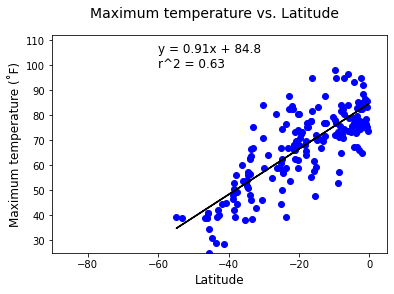

In [64]:
y_values = ((SH_cities_df["Temp_max_C"]*(9/5))+32)
x_values = SH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c="b")
plt.xlim(-90, 5)
plt.ylim(25, 112)

plt.plot(x_values,regress_values, "k-")
plt.annotate(line_eq,(-60,105),fontsize=12,color="black")
r2 = (rvalue**2).round(decimals=2)
r2_text = (f"r^2 = {r2}")
plt.annotate(r2_text, (-60,99),fontsize=12,color="black")
plt.xlabel('Latitude', size=12)
plt.ylabel('Maximum temperature (˚F)', size=12)
plt.suptitle('Maximum temperature vs. Latitude', size=14)

#print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/Fig6_SH_Max_temp_vs_latitude.png')
plt.show()

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.000806740564761948


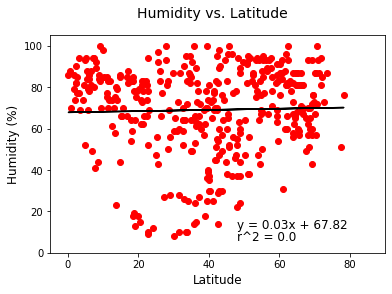

In [66]:
y_values = NH_cities_df["Humidity"]
x_values = NH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c="r")
plt.xlim(-5, 90)
plt.ylim(0, 105)

plt.plot(x_values,regress_values,"k-")
plt.annotate(line_eq,(48,12),fontsize=12,color="black")
r2 = (rvalue**2).round(decimals=2)
r2_text = (f"r^2 = {r2}")
plt.annotate(r2_text, (48,6),fontsize=12,color="black")
plt.xlabel('Latitude', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.suptitle('Humidity vs. Latitude', size=14)

plt.savefig('../output_data/Fig7_NH_Humidity_vs_latitude.png')
#print(f"The r-squared is: {rvalue**2}")

plt.show()

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.030034873081852542


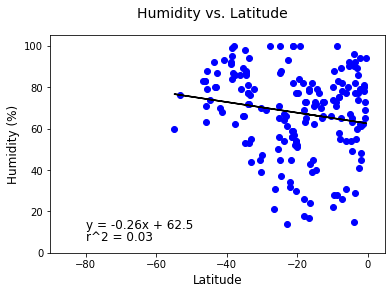

In [67]:
y_values = SH_cities_df["Humidity"]
x_values = SH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c="b")
plt.xlim(-90, 5)
plt.ylim(0, 105)

plt.plot(x_values,regress_values,"k-")
plt.annotate(line_eq,(-80,12),fontsize=12,color="black")
r2 = (rvalue**2).round(decimals=2)
r2_text = (f"r^2 = {r2}")
plt.annotate(r2_text, (-80,6),fontsize=12,color="black")
plt.xlabel('Latitude', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.suptitle('Humidity vs. Latitude', size=14)

plt.savefig('../output_data/Fig8_SH_Humidity_vs_latitude.png')
#print(f"The r-squared is: {rvalue**2}")

plt.show()

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00029719000933163786


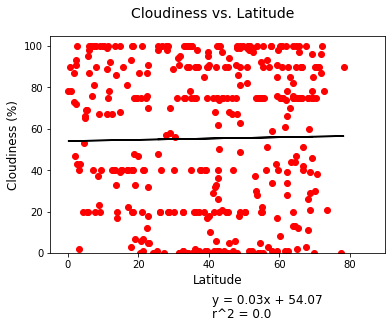

In [68]:
y_values = NH_cities_df["Clouds"]
x_values = NH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c="r")
plt.xlim(-5, 90)
plt.ylim(0, 105)

plt.plot(x_values,regress_values,"k-")
plt.text(0.5, -0.05, line_eq, fontsize=12, transform=plt.gcf().transFigure)
r2 = (rvalue**2).round(decimals=2)
r2_text = (f"r^2 = {r2}")
plt.text(0.5, -0.1, r2_text, fontsize=12, transform=plt.gcf().transFigure)
plt.xlabel('Latitude', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.suptitle('Cloudiness vs. Latitude', size=14)

plt.savefig('../output_data/Fig9_NH_Cloudiness_vs_latitude.png')
#print(f"The r-squared is: {rvalue**2}")

plt.show()

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.001605776110133886


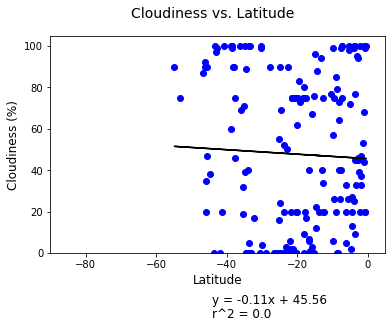

In [69]:
y_values = SH_cities_df["Clouds"]
x_values = SH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c="blue")
plt.xlim(-90, 5)
plt.ylim(0, 105)

plt.plot(x_values,regress_values,"k-")
plt.text(0.5, -0.05, line_eq, fontsize=12, transform=plt.gcf().transFigure)
r2 = (rvalue**2).round(decimals=2)
r2_text = (f"r^2 = {r2}")
plt.text(0.5, -0.1, r2_text, fontsize=12, transform=plt.gcf().transFigure)
plt.xlabel('Latitude', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.suptitle('Cloudiness vs. Latitude', size=14)

plt.savefig('../output_data/Fig10_SH_Cloudiness_vs_latitude.png')
#print(f"The r-squared is: {rvalue**2}")

plt.show()

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007953460957747606


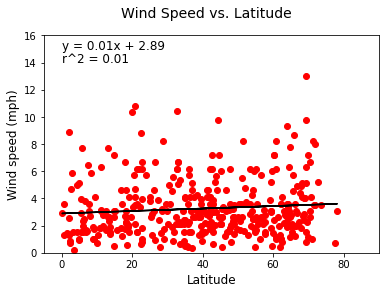

In [70]:
y_values = NH_cities_df["Wind_speed_mph"]
x_values = NH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c="red")
plt.xlim(-5, 90)
plt.ylim(0, 16)

plt.plot(x_values,regress_values,"k-")
plt.annotate(line_eq,(0,15),fontsize=12,color="black")
r2 = (rvalue**2).round(decimals=2)
r2_text = (f"r^2 = {r2}")
plt.annotate(r2_text, (0,14),fontsize=12,color="black")
plt.xlabel('Latitude', size=12)
plt.ylabel('Wind speed (mph)', size=12)
plt.suptitle('Wind Speed vs. Latitude', size=14)

plt.savefig('../output_data/Fig11_NH_Wind_Speed_vs_latitude.png')
#print(f"The r-squared is: {rvalue**2}")

plt.show()

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.014813552071362545


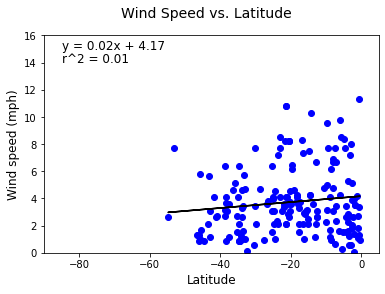

In [71]:
y_values = SH_cities_df["Wind_speed_mph"]
x_values = SH_cities_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c="blue")
plt.xlim(-90, 5)
plt.ylim(0, 16)

plt.plot(x_values,regress_values,"k-")
plt.annotate(line_eq,(-85,15),fontsize=12,color="black")
r2 = (rvalue**2).round(decimals=2)
r2_text = (f"r^2 = {r2}")
plt.annotate(r2_text, (-85,14),fontsize=12,color="black")
plt.xlabel('Latitude', size=12)
plt.ylabel('Wind speed (mph)', size=12)
plt.suptitle('Wind Speed vs. Latitude', size=14)

plt.savefig('../output_data/Fig12_SH_Wind_Speed_vs_latitude.png')
#print(f"The r-squared is: {rvalue**2}")

plt.show()